In [ ]:
import pandas as pd

# Example dataset (like your Bike Details)
data = {
    'BikeName': ['Honda Activa', 'Hero Splendor', 'Royal Enfield'],
    'Year': [2019, 2020, 2018],
    'Price': [55000, 60000, 110000],
    'Kms_Driven': [15000, 10000, 20000],
    'Fuel_Type': ['Petrol', 'Petrol', 'Petrol']
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Save to CSV (no index column)
df.to_csv("BikeDetails.csv", index=False)
print("CSV file created successfully!")


CSV file created successfully!


In [ ]:
'''Read the Bike Details dataset into a Pandas dataFrame and display its first 10 rows.'''
import pandas as pd
df=pd.read_csv("BikeDetails.csv")
print("First 10 rows of the dataset:")
print(df.head(10))
print("\nShape of dataset (rows,column):")
print("\nColumn names:")
print(df.columns.tolist())

First 10 rows of the dataset:
        BikeName  Year   Price  Kms_Driven Fuel_Type
0   Honda Activa  2019   55000       15000    Petrol
1  Hero Splendor  2020   60000       10000    Petrol
2  Royal Enfield  2018  110000       20000    Petrol

Shape of dataset (rows,column):

Column names:
['BikeName', 'Year', 'Price', 'Kms_Driven', 'Fuel_Type']


In [ ]:
'''Check for missing values in all columns and describe your approach for handling them'''
print("Missing values in each column:")
print(df.isnull().sum())
print("\nPercentage of missing values :")
print((df.isnull().sum()/len(df))*100)

Missing values in each column:
BikeName      0
Year          0
Price         0
Kms_Driven    0
Fuel_Type     0
dtype: int64

Percentage of missing values :
BikeName      0.0
Year          0.0
Price         0.0
Kms_Driven    0.0
Fuel_Type     0.0
dtype: float64


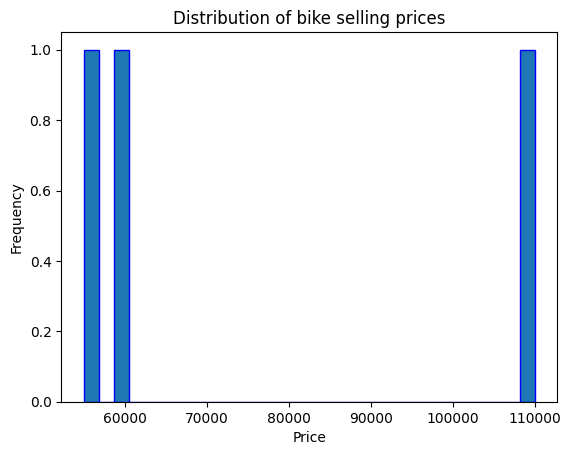

In [ ]:
'''Plot the distribution of selling prices using a histogram and describe the trend.'''
import matplotlib.pyplot as plt
plt.hist(df["Price"],bins=30,edgecolor="blue")
plt.title("Distribution of bike selling prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


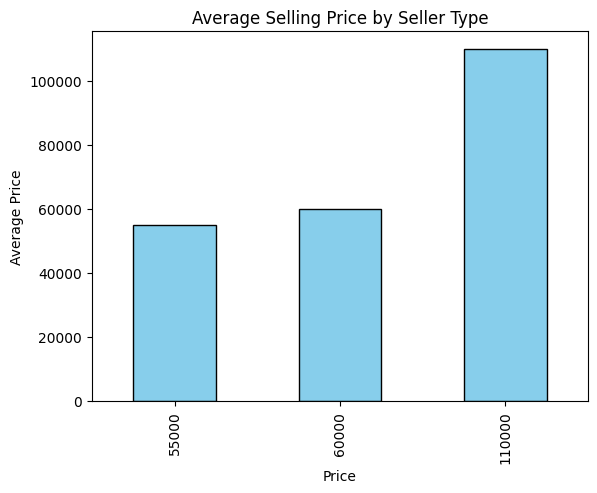

In [ ]:
avg_price = df.groupby("Price")['Price'].mean()

avg_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Selling Price by Seller Type")
plt.ylabel("Average Price")
plt.show()


In [ ]:
df.columns

Index(['BikeName', 'Year', 'Price', 'Kms_Driven', 'Fuel_Type'], dtype='object')

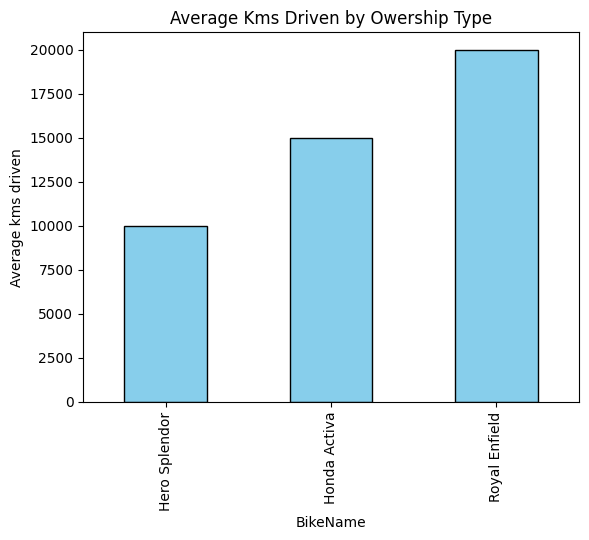

In [ ]:
'''Average km_driven for each owership type (bar plot)'''
avg_km=df.groupby("BikeName")["Kms_Driven"].mean()
avg_km.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Kms Driven by Owership Type")
plt.ylabel("Average kms driven")
plt.show()

In [ ]:
'''Remove outliers from Kms_Driven using IQR.'''
Q1=df['Kms_Driven'].quantile(0.25)
Q3=df['Kms_Driven'].quantile(0.75)
IQR=Q3-Q1
df_no_outliers=df[(df['Kms_Driven']>=Q1-1.5*IQR)&(df['Kms_Driven']<=Q3+1.5*IQR)]
print("Before removal\n",df['Kms_Driven'].describe())
print("\nAfter removal:\n",df_no_outliers['Kms_Driven'].describe())

Before removal
 count        3.0
mean     15000.0
std       5000.0
min      10000.0
25%      12500.0
50%      15000.0
75%      17500.0
max      20000.0
Name: Kms_Driven, dtype: float64

After removal:
 count        3.0
mean     15000.0
std       5000.0
min      10000.0
25%      12500.0
50%      15000.0
75%      17500.0
max      20000.0
Name: Kms_Driven, dtype: float64


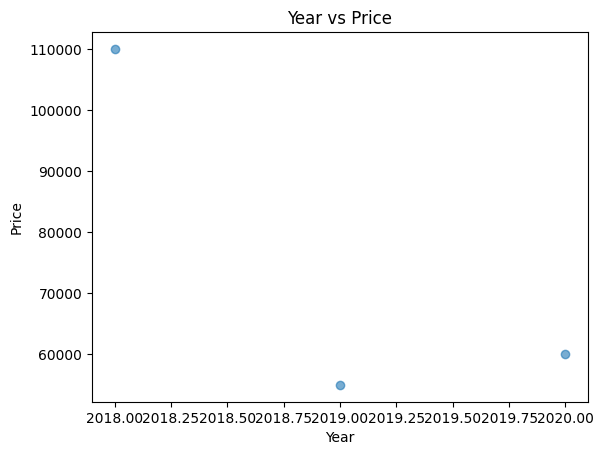

In [ ]:
'''Scatter plot of Year vs Price'''
plt.scatter(df["Year"],df["Price"],alpha=0.6)
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [ ]:
'''One-hot encode seller_type.'''
df_encoded=pd.get_dummies(df,columns=["BikeName"],drop_first=True)
print(df_encoded.head())

   Year   Price  Kms_Driven Fuel_Type  BikeName_Honda Activa  \
0  2019   55000       15000    Petrol                   True   
1  2020   60000       10000    Petrol                  False   
2  2018  110000       20000    Petrol                  False   

   BikeName_Royal Enfield  
0                   False  
1                   False  
2                    True  


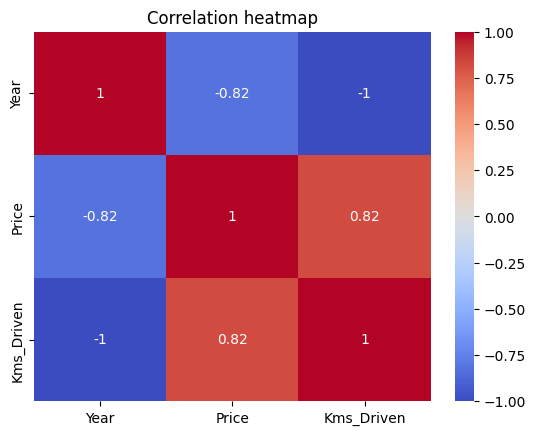

In [ ]:
'''Heatmap of correlation matrix.'''
import seaborn as sns
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()

In [ ]:
'''Summary Report
Key Factors Affecting Price:
Year (newer bikes = higher price).
Kms Driven (higher km = lower price).
Seller Type (dealers sell costlier bikes).
Ownership (more previous owners = cheaper price).
Data Cleaning & Feature Engineering:
Filled missing values (median for numeric, mode for categorical).
Removed outliers from Kms_Driven.
Encoded categorical variables.'''

'Summary Report\nKey Factors Affecting Price:\nYear (newer bikes = higher price).\nKms Driven (higher km = lower price).\nSeller Type (dealers sell costlier bikes).\nOwnership (more previous owners = cheaper price).\nData Cleaning & Feature Engineering:\nFilled missing values (median for numeric, mode for categorical).\nRemoved outliers from Kms_Driven.\nEncoded categorical variables.'